# Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from adjustText import adjust_text
import scipy.stats as stats

# Introdução

A análise de regressão é uma dos mais conhecidas técnicas estatísticas de natureza preditiva que nos permite construir modelos capazes de explicar uma variável em função de outras, por exemplo, um agricultor poderia querer analisar como o crescimento de sua plantação pode ser explicado em função da quantidade de adubo e irrigação ou um governante a relação entre gastos com educação e notas no Pisa. Diferente de outros métodos já apresentados em projetos anteriores como a análise de Cluster, PCA e MCA, neste o pesquisador precisa especificar quais variáveis irá utilizar na análise, neste projeto busquei estimar uma função que capturasse a relação de risco e retorno do mercado dos EUA através de diferentes índices representativos.

## Reta do Mercado de Capitais

A Reta do Mercado de Capitais (Capital Market Line - CML) é uma relação teórica entre a taxa livre de risco medido pela remuneração de títulos públicos de curto prazo e os ativos com risco de uma carteira representativa do mercado de ações (S&P 500, por exemplo). É intuitivo pensar que essa reta seja ascendente visto que na medida em que aumenta-se o risco deve-se aumentar o retorno esperado e que, portanto, podemos construir N carteiras de risco zero alocando 100% em ativos livres de risco até o risco de mercado alocando 0% em ativos livres de risco (desconsiderando alavancagem). Neste projeto tive como objetivo estimar uma função de regressão da relação de risco e retorno com base em diferentes índices representativos do mercado dos EUA (títulos públicos, títulos privados, índices setoriais e de mercado). Qual seria o retorno esperado do investidor se ele decidisse adicionar mais risco a sua carteira? Esta análise buscará responder esta pergunta.

# Base de Dados

Os dados foram coletados buscando representar de forma ampla porém não exaustiva os índices representativos do mercado dos EUA, indo desde títulos públicos de curto-prazo até ações do setor de tecnologia.

## Dicionário da Base de Dados

In [2]:
tickers_nomes = {
    # Índices de Mercado
    '^FTW5000': 'Wilshire 5000',
    '^GSPC': 'S&P 500',
    '^DJI': 'Dow Jones Industrial Average',
    '^RUT': 'Russell 2000',
    
    # Índices Setores
    '^NDX' : 'U.S. Tecnology',
    '^SP500-40': 'U.S. Financials',
    '^SP500-35': 'U.S. Healthcare',
    '^SP500-25': 'U.S. Consumer Services',
    '^SP500-50': 'U.S. Telecommunications',
    '^SP500-20': 'U.S. Industrials',
    '^SP500-30': 'U.S. Consumer Goods',
    '^SP500-15': 'U.S. Basic Materials',
    '^SP500-1010': 'U.S. Energy',

    # Corporate Bonds
    'LQD': 'Investment Grade Corporate Bond',
    'HYG': 'High Yield Corporate Bond',
    
    # Treasures
    'SHY': '1-3 Year Treasury Bond',
    'IEF': '7-10 Year Treasury Bond',
    'TIP': 'TIPS Bond',
}

## Extração de Dados com Yahoo Finance

In [3]:
indices = list(tickers_nomes.keys()) # Extraindo o código do meu dicionário
i_data = pd.DataFrame()

for i in indices:
    i_data[i] = yf.download(i, period = 'max', progress=False)['Adj Close']

In [4]:
i_data = i_data.resample('M').last().dropna() # Ajustando pro fechamento mensal
i_data

,^FTW5000,^GSPC,^DJI,^RUT,^NDX,^SP500-40,^SP500-35,^SP500-25,^SP500-50,^SP500-20,^SP500-30,^SP500-15,^SP500-1010,LQD,HYG,SHY,IEF,TIP
Date,,,,,,,,,,,,,,,,,,
2007-04-30,14952.349609,1482.369995,13062.910156,814.570007,1867.750000,497.290009,418.899994,307.410004,165.130005,339.799988,281.339996,239.229996,487.500000,55.059616,35.695076,62.178322,55.092693,60.976524
2007-05-31,15462.160156,1530.619995,13627.639648,847.179993,1928.189941,507.140015,424.390015,315.619995,180.979996,354.570007,285.149994,252.289993,523.119995,54.381962,35.828262,62.136425,54.325008,60.176819
2007-06-30,15210.650391,1503.349976,13408.620117,833.700012,1934.099976,485.410004,409.010010,310.209991,176.210007,354.500000,278.440002,250.100006,529.710022,53.941479,34.698788,62.431660,54.070915,60.047592
2007-07-31,14682.660156,1455.270020,13211.990234,776.119995,1932.060059,446.820007,390.980011,292.130005,171.119995,358.029999,271.799988,244.380005,533.450012,53.496933,33.352421,62.996078,55.291214,61.429150
2007-08-31,14847.700195,1473.989990,13357.740234,792.859985,1988.729980,452.459991,399.839996,292.820007,170.990005,357.329987,278.510010,242.479996,536.349976,54.773449,35.084721,63.656872,56.542492,61.934101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,50572.378906,5035.689941,37815.921875,1973.910034,17440.689453,671.090027,1634.439941,1420.810059,277.980011,1028.089966,805.510010,558.159973,714.950012,103.441658,74.749863,80.095787,90.338699,103.530739
2024-05-31,52875.519531,5277.509766,38686.320312,2070.129883,18536.650391,691.280029,1670.880005,1423.510010,296.230011,1042.880005,824.229980,575.270020,708.039978,105.731567,75.971230,80.672089,91.964943,105.370522
2024-06-30,54470.660156,5460.479980,39118.859375,2047.689941,19682.869141,684.260010,1700.329956,1492.140015,310.190002,1031.959961,819.859985,556.500000,698.229980,106.362076,76.335396,81.111168,93.084137,106.172935


## Retorno acumulado em janelas móveis

Os retornos foram calculados com base em janelas móveis de 5 anos por trazem resultados mais concisos e com menor volatilidade em relações a janelas móveis de 1 ano, os resultados foram plotados em dois gráficos separando entre renda fixa e ações: 

In [47]:
n = 60 # Periods
retorno = i_data.pct_change(periods=n).dropna() # Cálculo do retorno acumulado na janela de 5 anos
retorno

,^FTW5000,^GSPC,^DJI,^RUT,^NDX,^SP500-40,^SP500-35,^SP500-25,^SP500-50,^SP500-20,^SP500-30,^SP500-15,^SP500-1010,LQD,HYG,SHY,IEF,TIP
Date,,,,,,,,,,,,,,,,,,
2012-04-30,-0.017576,-0.056976,0.011538,0.002836,0.458268,-0.582678,0.036668,0.174197,-0.175680,-0.058829,0.250622,-0.031267,0.093641,0.397531,0.319258,0.173142,0.515121,0.458178
2012-05-31,-0.111363,-0.143922,-0.090565,-0.100758,0.309451,-0.628919,-0.016541,0.076548,-0.228312,-0.155371,0.218061,-0.154822,-0.089100,0.425659,0.272021,0.174599,0.580623,0.506313
2012-06-30,-0.062613,-0.093917,-0.039417,-0.042233,0.352422,-0.595785,0.073372,0.111666,-0.164974,-0.128350,0.284298,-0.112075,-0.055181,0.449827,0.374589,0.167910,0.581470,0.499458
2012-07-31,-0.021280,-0.052190,-0.015388,0.013941,0.367727,-0.557406,0.142974,0.184747,-0.091982,-0.127336,0.356954,-0.096857,-0.012091,0.512792,0.444698,0.159998,0.568237,0.491453
2012-08-31,-0.011256,-0.045733,-0.019981,0.024254,0.393975,-0.550480,0.121023,0.226419,-0.115153,-0.119861,0.313849,-0.072501,-0.005239,0.476742,0.390460,0.148039,0.531734,0.475638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,0.663017,0.709430,0.422030,0.240509,1.241313,0.443360,0.581691,0.492228,0.659681,0.562518,0.356900,0.551134,0.460930,0.032622,0.131704,0.044994,-0.055259,0.097281
2024-05-31,0.863823,0.917658,0.558987,0.412585,1.600555,0.605202,0.659265,0.620313,0.880587,0.724339,0.446195,0.746842,0.638602,0.038343,0.172874,0.044970,-0.066704,0.097548
2024-06-30,0.799609,0.856195,0.470636,0.307117,1.565854,0.491022,0.585434,0.578016,0.888754,0.583514,0.372518,0.515770,0.481561,0.011688,0.142458,0.045837,-0.066706,0.097680


(-1.0, 3.0)

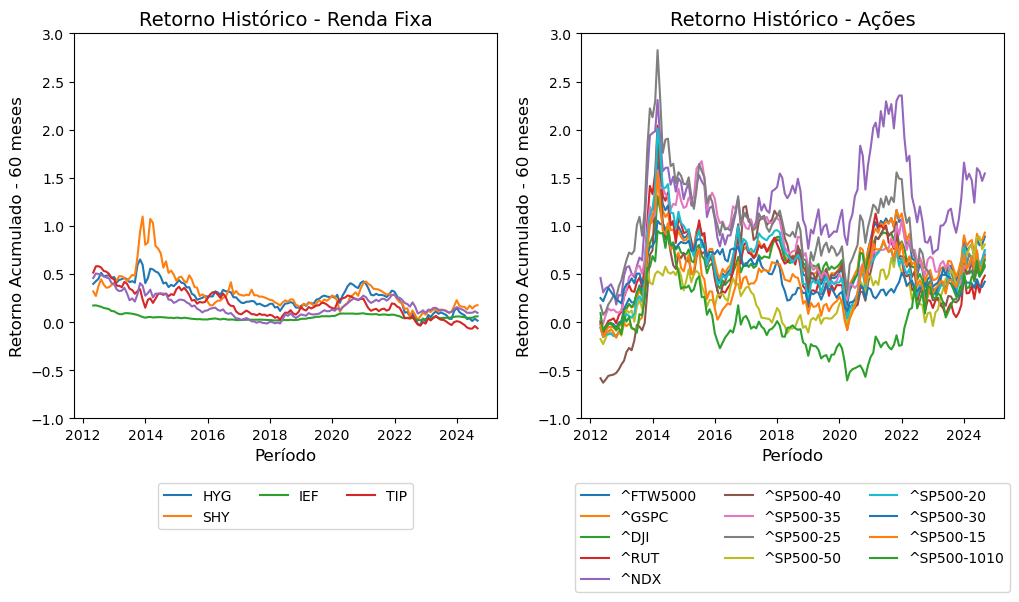

In [49]:
n = 60 # Periods
retorno = i_data.pct_change(periods=n).dropna() # Cálculo do retorno acumulado na janela de 5 anos

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(retorno.iloc[:,13:])
plt.title('Retorno Histórico - Renda Fixa', fontsize = 14)
plt.legend(retorno.columns[14:], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.xlabel('Período', fontsize = 12)
plt.ylabel('Retorno Acumulado - 60 meses', fontsize = 12)
plt.ylim(-1,3)

plt.subplot(1,2,2)
plt.plot(retorno.iloc[:,0:13])
plt.title('Retorno Histórico - Ações', fontsize = 14)
plt.legend(retorno.columns[0:13], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.xlabel('Período', fontsize = 12)
plt.ylabel('Retorno Acumulado - 60 meses', fontsize = 12)
plt.ylim(-1,3)

## Calculando as Variáveis

Como estamos calculando o retorno acumulado de períodos de 5 anos, para que possamos anualiza-los foi adotado aos cálculos abaixo: 

### Retorno Geométrico

<br>
<div align="center">
$R_{\text{geom}} = \left( \prod_{i=1}^{n} (1 + R_i) \right)^{\frac{1}{n}} - 1$
</div>
    
### Volatilidade Anualizada

<br>
<div align="center">
$\sigma_{\text{anual}} = \sigma_{\text{período}} \times \sqrt{\frac{1}{período}}$
</div>

In [50]:
ri_data = pd.DataFrame()

ri_data['Retornos'] = ((retorno+1).prod()**(1/(len(retorno)*(n/12)))-1)*100
ri_data['Volatilidade'] = ((retorno).std()*np.sqrt(1/(n/12)))*100
ri_data['Índice'] = list(tickers_nomes.values()) 
ri_data = ri_data[['Índice','Retornos','Volatilidade']]

ri_data.sort_values(by='Retornos')

,Índice,Retornos,Volatilidade
^SP500-1010,U.S. Energy,-0.049250,15.329839
SHY,1-3 Year Treasury Bond,1.080656,1.456610
TIP,TIPS Bond,3.154346,5.292865
IEF,7-10 Year Treasury Bond,3.224539,6.430939
^SP500-50,U.S. Telecommunications,4.509570,11.284380
LQD,Investment Grade Corporate Bond,4.723397,6.535154
HYG,High Yield Corporate Bond,5.334187,8.745063
^SP500-15,U.S. Basic Materials,6.823307,13.904076
^SP500-40,U.S. Financials,7.300838,19.882587
^SP500-30,U.S. Consumer Goods,7.879929,9.677839


### Gráfico de Dispersão 

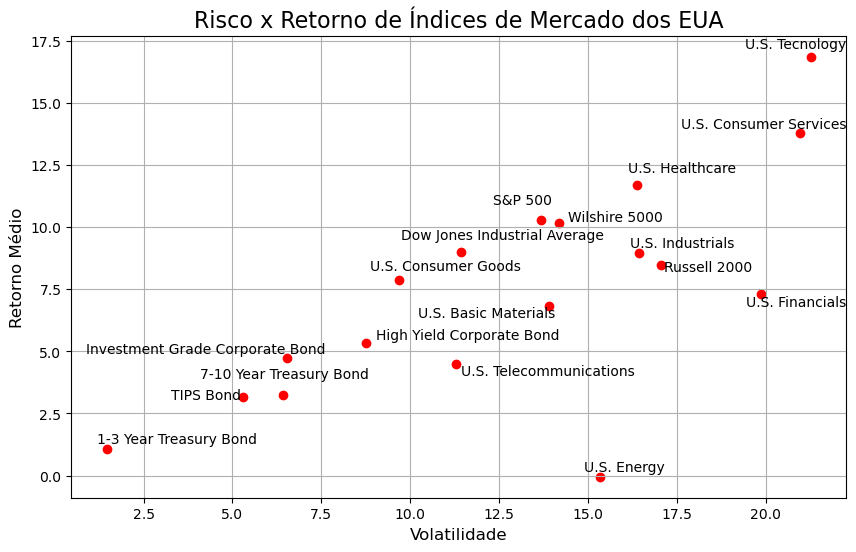

In [58]:
plt.figure(figsize=(10,6))

plt.scatter(ri_data.iloc[:,2], ri_data.iloc[:,1], color = 'red')

texts = [] 
for i, txt in enumerate(ri_data['Índice']):
    texts.append(plt.text(ri_data.iloc[i, 2], ri_data.iloc[i, 1], txt, ha='center'))

plt.xlabel('Volatilidade', fontsize = 12)
plt.ylabel('Retorno Médio', fontsize = 12)
plt.title('Risco x Retorno de Índices de Mercado dos EUA', fontsize = 16)
plt.grid()
adjust_text(texts)

### Estatísticas Descritivas

In [8]:
ri_data.describe()

,Retornos,Volatilidade
count,18.000000,18.000000
mean,7.407206,12.776757
std,4.358738,5.628256
min,-0.049250,1.456610
25%,4.563027,8.978257
50%,7.590383,13.788210
75%,9.875752,16.434277
max,16.876037,21.277134


# Regressão Linear

A análise de regressão é uma técnica estatística que busca explicar a relação de dependência entre uma variável a ser explicada (dependente) e uma ou mais variáveis explanatórias (independentes), alguns exemplos que Woodridge traz é a relação entre produção de soja e uso de fertilizantes ou de salários e anos de estudo. Um modelo de regressão linear simples pode ser representado da seguinte forma: 

<br>
<div align="center">
$Y_i = \beta_0 + \beta_1 X_i + u_i$ 
</div>
    

- $Y_i = \text{variável dependente ou explicada} \\[1pt]$
- $X_i = \text{variável independente ou explicativa} \\[1pt]$
- $\beta_0 = \text{constante} \\[1pt]$
- $\beta_1 = \text{coeficiente angular} \\[1pt]$
- $u_i = \text{Erro (Resíduo)}$

## Hipóteses

Há algumas hipóteses subjacentes ao modelo que apresentadas por Fávero podem ser resumidas como:  

1. Normalidade dos Resíduos
2. Baixa correlação entre as variáveis explicativas
3. Resíduos não apresentam correlação com as variáveis explicativas 
4. Resíduos são aleatórios

## Método dos Mínimos Quadrados

O método utilizado para estimar a função de regressão é conhecido como Método dos Mínimos Quadrados (MQQ) ou Ordinary Least Squares (OLS). Por meio deste método é possível estimar uma reta formada por valores de estimados de Yi (variável dependente) em função dos valores de X (variável dependente) de tal modo que a soma do quadrado da diferença dos valores estimados e observados seja a mínima possível. 

Abaixo simulei uma função de regressão com observações aleatórias, a diferença entre o valor observado e o valor previsto pela reta de regressão é o erro (resíduo) representado em vermelho. Pode-se observar também que para cada valor de X representado pelo eixo horizontal há um valor Yi representado pelo eixo vertical que é o valor previsto (Yi). 

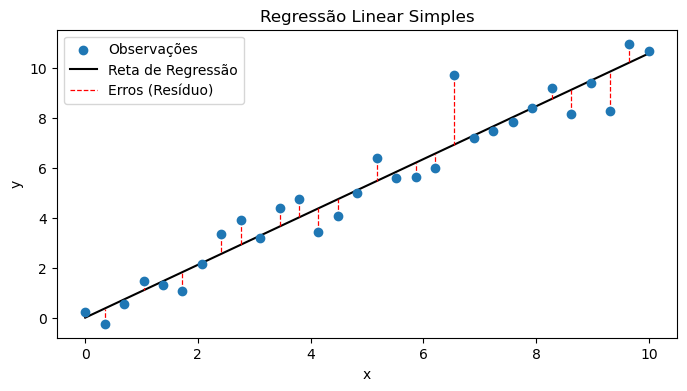

In [9]:
x = np.linspace(0, 10, 30)
y = x + np.random.normal(0, 1, x.shape)

model = sm.OLS(y, x).fit()

plt.figure(figsize=(8,4))

plt.scatter(x, y, label="Observações", zorder=3)
plt.plot(x, model.fittedvalues, color="black", label="Reta de Regressão")

for i in range(len(x)):
    plt.plot([x[i], x[i]],
             [y[i], model.fittedvalues[i]],
             color='red', linestyle='--', linewidth=0.9)

plt.plot([x[0], x[0]], [y[0], model.fittedvalues[0]], color='red', linestyle='--', label="Erros (Resíduo)", linewidth=0.9)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão Linear Simples")
plt.legend()
plt.show()

Para quem tiver interesse, a derivação algébrica e matricial do MQO (OLS) pode ser acessada nos links abaixo: 

Algébrica: https://are.berkeley.edu/courses/EEP118/current/section/derivation.pdf

Matricial: https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf

## Rodando a Regressão 

Com base nas variáveis selecionadas anteriormente, rodamos um modelo de regressão com a função OLS do statsmodels, os resultado podem ser obtidos com a instância .summary(): 

In [57]:
y = ri_data['Retornos'] # Variável Dependente
x = sm.add_constant(ri_data['Volatilidade']) # Variável Independente

modelo = sm.OLS(y, x).fit() # Modelo

modelo.summary() # Resultados

C:\Users\emanu\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Retornos   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     17.31
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           0.000737
Time:                        19:16:52   Log-Likelihood:                -44.927
No. Observations:                  18   AIC:                             93.85
Df Residuals:                      16   BIC:                             95.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2744      1.865      0.147      0.885      -3.679       4.228
Volatilidade     0.5583      0.134      4.160      0.001       0.274       0.843
==============================================================================
Omnibus:                       12.099   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.581
Skew:                          -1.344   Prob(JB):                      0.00831
Kurtosis:                       5.355   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Função de Regressão

Os coeficientes podem ser obtidos com a instância .params e abaixo representamos a função de regressão estimada por OLS: 

<br>
<div align="center">
$
Retorno = 0.2509 + 0.5583 * Volatilidade
$
</div>

Obs: Leia-se, para cada 1 p.p. adicional de volatilidade, há um incremento de 0.57 p.p no retorno esperado. 

In [11]:
modelo.params

const           0.274395
Volatilidade    0.558265
dtype: float64

## Normalidade dos Resíduos

Uma das hipóteses do MQO é que os resíduos (erros) calculados sejam normalmente distribuídos, segundo recomendado por Favero quando temos uma quantidade suficientemente grande de observações (>30) é recomendado rodar o teste de Shapiro-Francia, caso contrário recomenda-se o uso do Shapiro-Wilk. Rodamos o teste Shapiro-Wilk e a estatística foi de 0.8892 e o pvalue associado é de 0.0293, portanto podemos rejeitar a hipótese nula e afirmar que os resíduos são normalmente distribuídos a um nível de significância de 5%. 

In [59]:
statistic, pvalue = stats.shapiro(modelo.resid)
statistic, pvalue

(0.8829612731933594, 0.02928515151143074)

## Avaliação do Modelo

- F apresenta um F crítico com um p-value associado bastante baixo, isto indica que que há modelo e ao menos um dos parâmetros é diferente de zero.

- R-squared (R2) indica que a função de regressão explica em torno de 52% dos valores observados.

- O parâmetro (β) é estatisticamente diferente de 0 a um nível de significância de 5%. Isto significa dizer que há estatisticamente uma relação de dependência entre o retorno e volatilidade.

- Os resíduos (e) são normalmente distribuídos segundo o teste Shapiro-Wilk. Isto significa dizer que a função de regressão linear foi apropriada para estimar a relação entre as variáveis (linear). 

## Gráfico da Função de Regressão

O gráfico abaixo representa a função de regressão estimada com os possíveis retornos esperados a um dado nível de risco assumido em um intervalo de confiança de 95%. 

<function matplotlib.pyplot.show(close=None, block=None)>

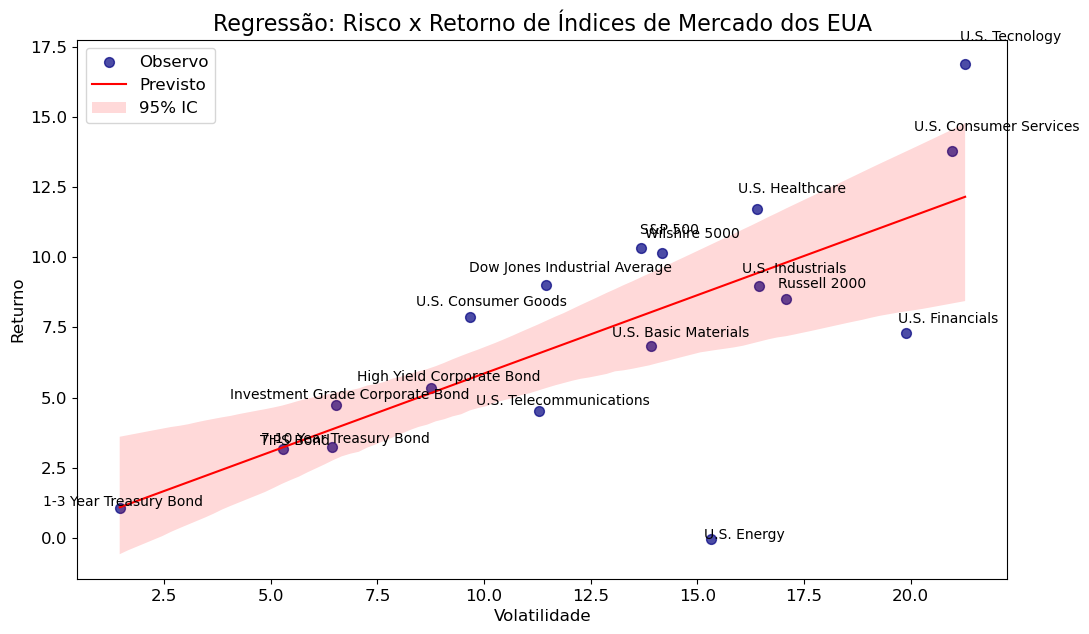

In [60]:
plt.figure(figsize=(12,7))
sns.regplot(data=ri_data, x='Volatilidade', y='Retornos', marker='o', ci=95,
            scatter_kws={"color":'navy', 'alpha':0.7, 's':50},
            line_kws={"color":'red', 'linewidth': 1.5},
            color='red')
plt.title('Regressão: Risco x Retorno de Índices de Mercado dos EUA', fontsize=16)
plt.xlabel('Volatilidade', fontsize=12)
plt.ylabel('Returno', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Observo', 'Previsto', '95% IC'],
           fontsize=12, loc='upper left')

texts = [] 
for i, txt in enumerate(ri_data['Índice']):
    texts.append(plt.text(ri_data.iloc[i, 2]*1.05, ri_data.iloc[i, 1]*1.05, txt, ha='center'))

plt.show

# Conclusão

Esta análise nos permitiu projeta a reta do mercado de capitais nos EUA com base no retorno e volatilidade de diferentes índices representativos do mercado, como esperado pela teoria há uma relação positiva e consistente entre risco e retorno. A função de regressão estimado nos permitiu estimar que para cada unidade adicional de risco medido pela volatilidade é esperado um incremento de 0,56 de retorno o que pode ser um parâmetro de referência ao montar portfólios que busquem ser eficientes. Deve-se observar nos dados que algumas observações desviam-se do que seria esperado como o U. S. Energy, ou seja, não há uma relação mecânica entre risco x retorno visto que algumas classes estão sujeitas a dinâmicas próprias que podem estar sujeitas a outras variáveis. É importante também dizer que o período definido pode influenciar de forma significativa nos resultados, no caso devido a presença de alguns tickers foi preciso reduzir o horizonte de analise pra 2007. 